## How To Use - Example:
<br>
<br>
load library

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as pt
import sys
path = r'path_to_cloned_repository'
sys.path.insert(0, path)
import technical_indicator
import portfolio_management

<br>
<br>
retrieve data

In [11]:
start_date = '2022-01-01'; end_date = '2024-11-01'
print(f'start: {start_date}', f'end: {end_date}')

start: 2022-01-01 end: 2024-11-01


In [12]:
df = yf.download(tickers='BTC-USD', threads=True, start=start_date, end=end_date)
df.columns = df.columns.str.lower().str.replace(' ','_')

[*********************100%%**********************]  1 of 1 completed


<br>
<br>
1. Simple Decycler

In [13]:
decycler = technical_indicator.simple_decycler(df['close'], hyst_percentage=1, return_df=True)
decycler['trigger'] = np.where((decycler['decycler'] > decycler['decycler'].shift(1)), 1, 0)
decycler['buy'] = np.where(decycler['trigger'] == 1, decycler['decycler'], np.nan)
decycler['sell'] = np.where(decycler['trigger'] == 0, decycler['decycler'], np.nan)

<Axes: title={'center': 'BTCUSD vs Simple Decycler Indicator'}, xlabel='Date'>

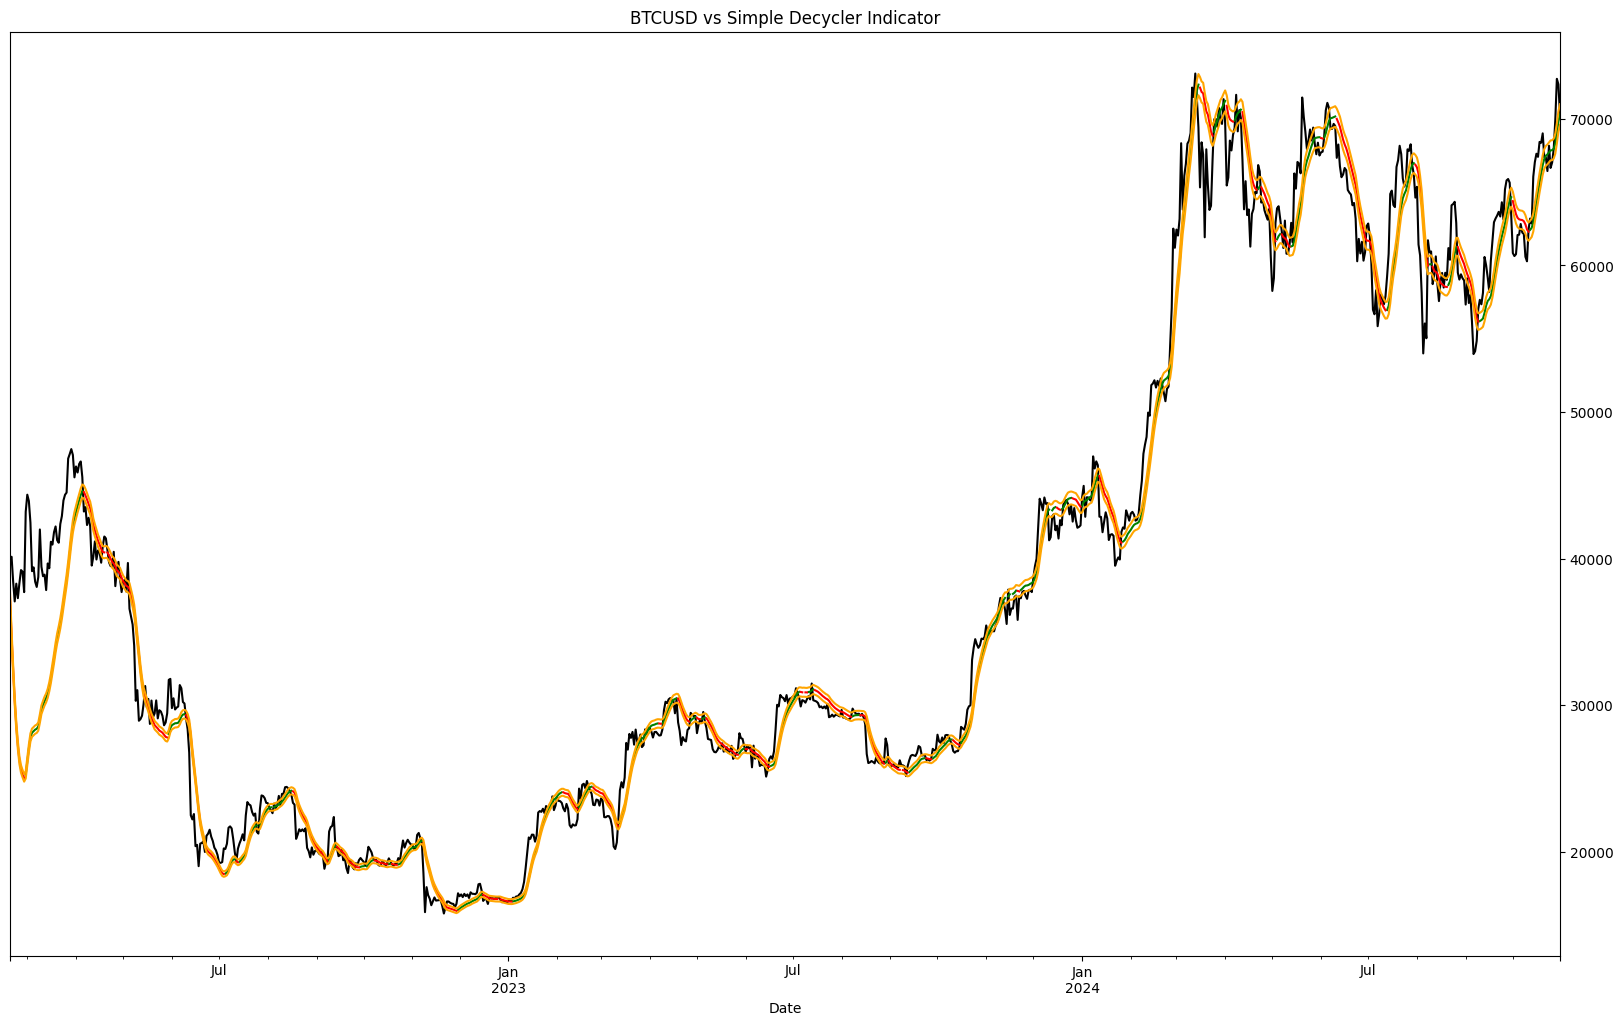

In [14]:
ax = pd.Series(decycler['close']).plot(color = 'black', figsize = (20,12))
ax.yaxis.set_label_position("right"); ax.yaxis.tick_right(); ax.set_title('BTCUSD vs Simple Decycler Indicator')
decycler['buy'].plot.line(color = 'green'); decycler['sell'].plot.line(color = 'red')
decycler['hyst_up'].plot(color = 'orange'); decycler['hyst_dn'].plot(color = 'orange')

<br>
<br>
2. Predictive Moving Average

In [15]:
pma = technical_indicator.predictive_moving_average(df['close'], return_df=True)
pma['trigger'] = np.where((pma['series'] > pma['series'].shift(1)), 1, 0)
pma['buy'] = np.where(pma['trigger'] == 1, pma['series'], np.nan)
pma['sell'] = np.where(pma['trigger'] == 0, pma['series'], np.nan)

<Axes: title={'center': 'BTCUSD vs Predictive Moving Average Indicator'}, xlabel='Date'>

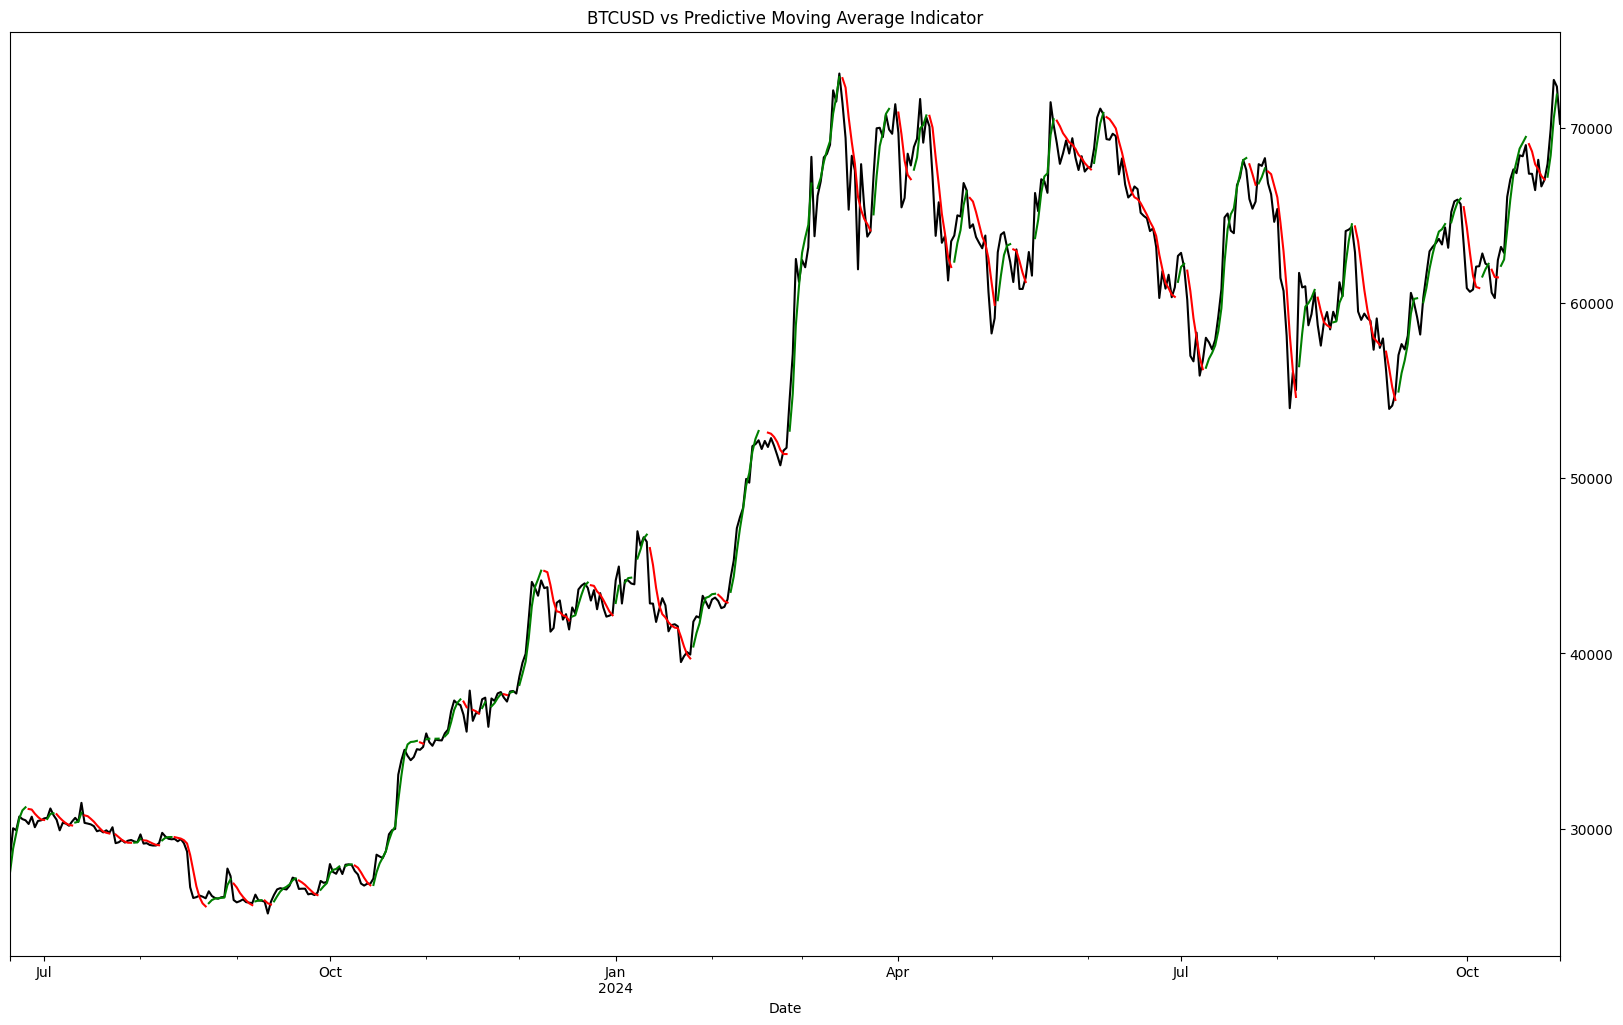

In [16]:
ax = pd.Series(pma['close'][-500:]).plot(color = 'black', figsize = (20,12))
ax.yaxis.set_label_position("right"); ax.yaxis.tick_right(); ax.set_title('BTCUSD vs Predictive Moving Average Indicator')
pma['buy'][-500:].plot.line(color = 'green'); pma['sell'][-500:].plot.line(color = 'red')

<br>
<br>
3. Kaufman Adaptive Moving Average

In [17]:
kama = technical_indicator.kama(df['close'], return_df=True)
kama['trigger'] = np.where((kama['kama'] > kama['kama'].shift(1)), 1, 0)
kama['buy'] = np.where(kama['trigger'] == 1, kama['kama'], np.nan)
kama['sell'] = np.where(kama['trigger'] == 0, kama['kama'], np.nan)

<Axes: title={'center': 'BTCUSD vs Kaufman Adaptive Moving Average Indicator'}, xlabel='Date'>

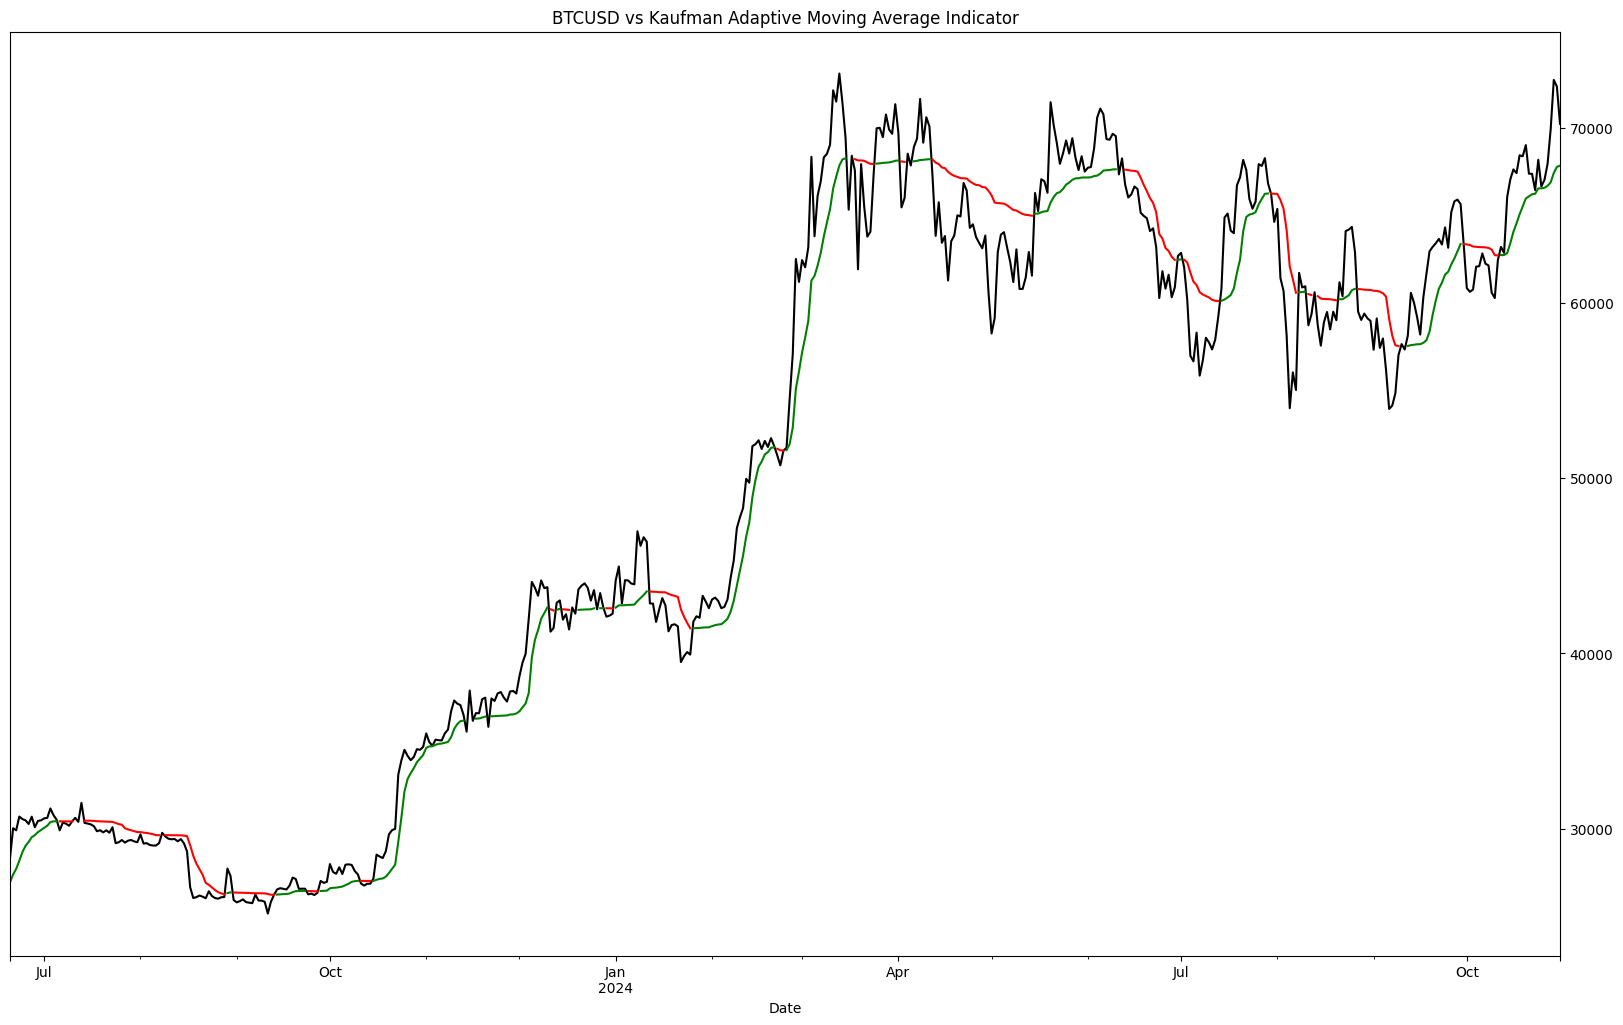

In [18]:
ax = pd.Series(kama['close'][-500:]).plot(color = 'black', figsize = (20,12))
ax.yaxis.set_label_position("right"); ax.yaxis.tick_right(); ax.set_title('BTCUSD vs Kaufman Adaptive Moving Average Indicator')
kama['buy'][-500:].plot.line(color = 'green'); kama['sell'][-500:].plot.line(color = 'red')